In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import visualkeras

from PIL import ImageFont
#font = ImageFont.truetype("arial.ttf", 12)

import warnings 
warnings.filterwarnings('ignore')

print("Tensorflow version:",tf.__version__)
print("Keras version:",keras.__version__)

Tensorflow version: 2.1.0
Keras version: 2.2.4-tf


In [3]:
# Importing the CIFAR-10 dataset from Keras 
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [4]:
print('X_train Shape: {}'.format(X_train.shape))
print('X_test Shape: {}'.format(X_test.shape))
print('Y_train Shape: {}'.format(Y_train.shape))
print('Y_test Shape: {}'.format(Y_test.shape))

X_train Shape: (50000, 32, 32, 3)
X_test Shape: (10000, 32, 32, 3)
Y_train Shape: (50000, 1)
Y_test Shape: (10000, 1)


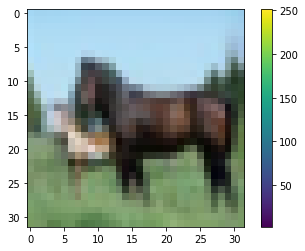

In [5]:
plt.figure()
plt.imshow(X_train[12])
plt.colorbar()

In [6]:
# Normalizing
X_train = X_train/255
X_test = X_test/255

# One-Hot-Encoding
Y_train_en = to_categorical(Y_train,10)
Y_test_en = to_categorical(Y_test,10)

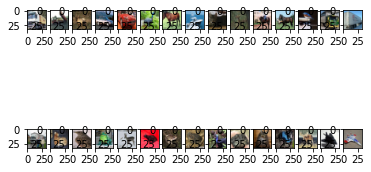

In [7]:
# Visualizing the data 
for i in range(1,31):
    plt.subplot(2, 15, i)
    plt.imshow(X_train[i])

In [8]:
# Model_3 with Batch Normalization
model_3 = Sequential()
model_3.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.2))
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.35))
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))
model_3.add(Dense(10, activation='softmax'))
model_3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
model_3.summary()
history_3 = model_3.fit(X_train, Y_train_en, epochs = 100, verbose = 1, validation_data = (X_test, Y_test_en))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        3136      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        65600     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       1

50000/50000 [==============================] - 24s 472us/sample - loss: 0.0891 - accuracy: 0.9690 - val_loss: 0.5509 - val_accuracy: 0.8647
Epoch 33/100
50000/50000 [==============================] - 24s 472us/sample - loss: 0.0894 - accuracy: 0.9692 - val_loss: 0.5692 - val_accuracy: 0.8675
Epoch 34/100
50000/50000 [==============================] - 24s 474us/sample - loss: 0.0833 - accuracy: 0.9718 - val_loss: 0.5821 - val_accuracy: 0.8615
Epoch 35/100
50000/50000 [==============================] - 24s 471us/sample - loss: 0.0856 - accuracy: 0.9715 - val_loss: 0.5936 - val_accuracy: 0.8639
Epoch 36/100
50000/50000 [==============================] - 24s 475us/sample - loss: 0.0791 - accuracy: 0.9727 - val_loss: 0.5849 - val_accuracy: 0.8612
Epoch 37/100
50000/50000 [==============================] - 24s 473us/sample - loss: 0.0773 - accuracy: 0.9739 - val_loss: 0.5538 - val_accuracy: 0.8692
Epoch 38/100
50000/50000 [==============================] - 24s 476us/sample - loss: 0.0778 - a

50000/50000 [==============================] - 24s 475us/sample - loss: 0.0366 - accuracy: 0.9877 - val_loss: 0.6773 - val_accuracy: 0.8633
Epoch 86/100
50000/50000 [==============================] - 24s 475us/sample - loss: 0.0389 - accuracy: 0.9870 - val_loss: 0.6249 - val_accuracy: 0.8712
Epoch 87/100
50000/50000 [==============================] - 24s 476us/sample - loss: 0.0336 - accuracy: 0.9882 - val_loss: 0.6473 - val_accuracy: 0.8695
Epoch 88/100
50000/50000 [==============================] - 24s 475us/sample - loss: 0.0372 - accuracy: 0.9874 - val_loss: 0.6591 - val_accuracy: 0.8662
Epoch 89/100
50000/50000 [==============================] - 24s 474us/sample - loss: 0.0375 - accuracy: 0.9876 - val_loss: 0.6576 - val_accuracy: 0.8738
Epoch 90/100
50000/50000 [==============================] - 24s 473us/sample - loss: 0.0352 - accuracy: 0.9882 - val_loss: 0.6324 - val_accuracy: 0.8733
Epoch 91/100
50000/50000 [==============================] - 24s 474us/sample - loss: 0.0350 - a

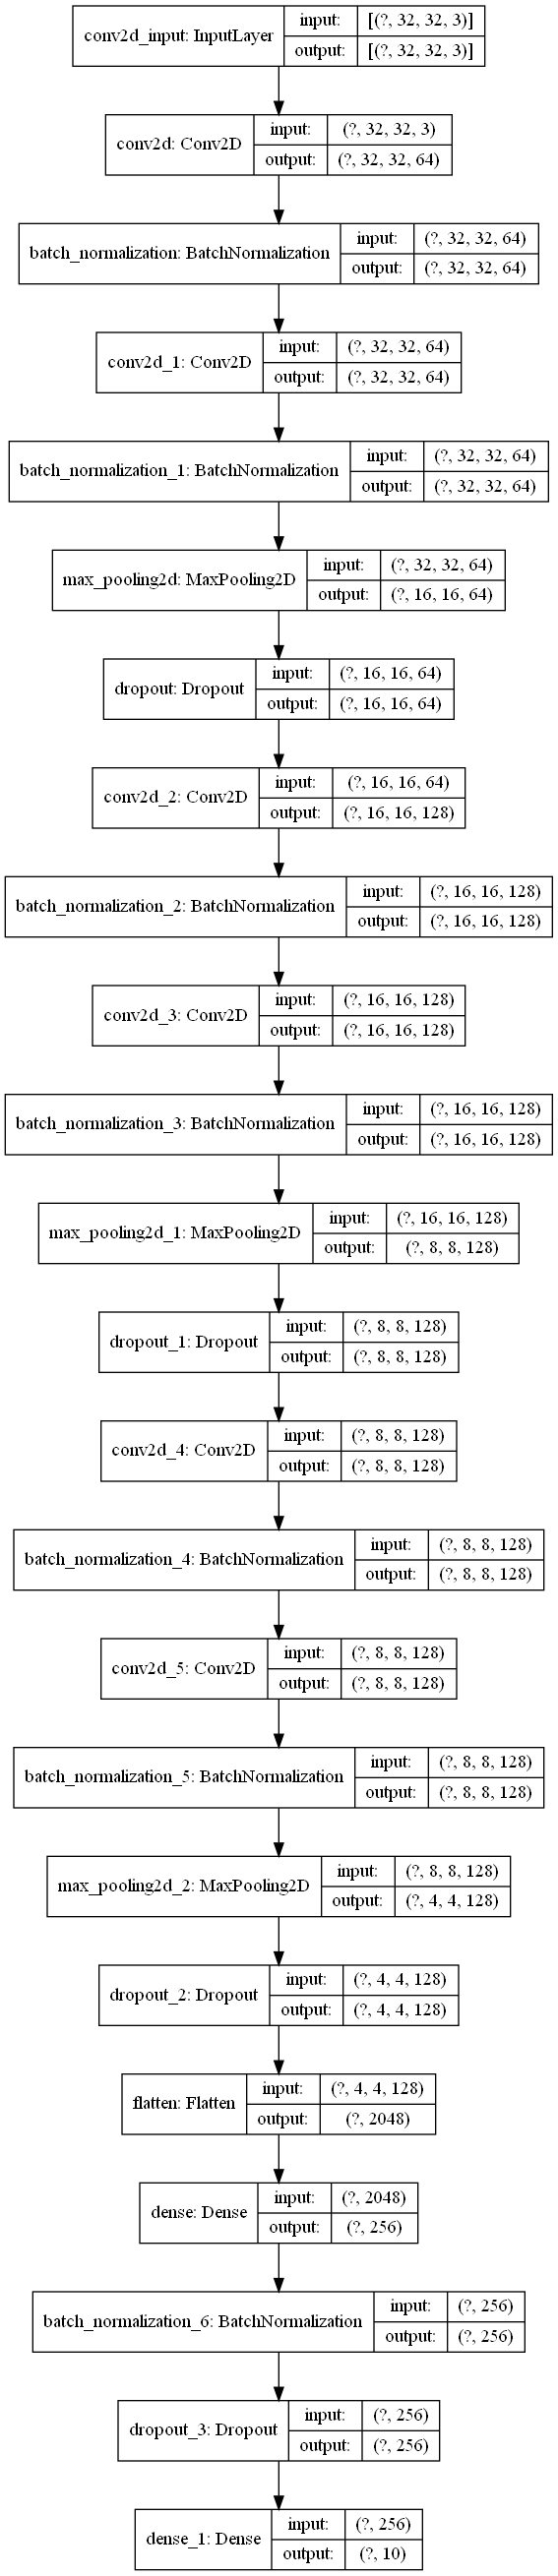

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model_3, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

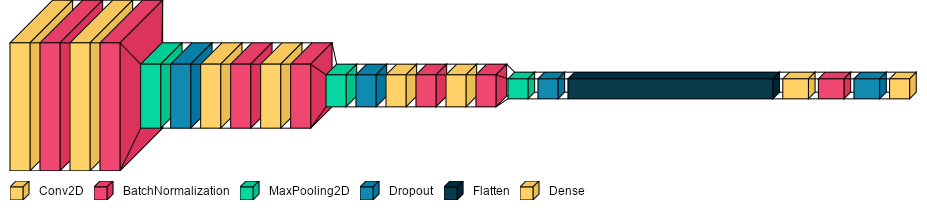

In [51]:
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model_3,font=font ,legend=True)

In [12]:
evaluation = model_3.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model_3 (with Batch Normalization): {}'.format(evaluation[1]))

10000/10000 [==============================] - 2s 151us/sample - loss: 0.6362 - accuracy: 0.8785
Test Accuracy of Model_3 (with Batch Normalization): 0.8784999847412109


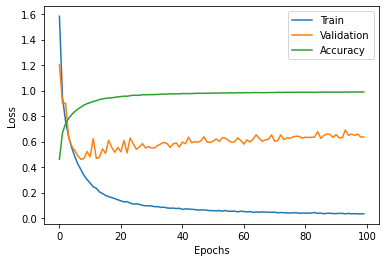

In [13]:
def plotloss(history_3):
    plt.plot(history_3.history['loss'])
    plt.plot(history_3.history['val_loss'])
    plt.plot(history_3.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()    
plotloss(history_3)

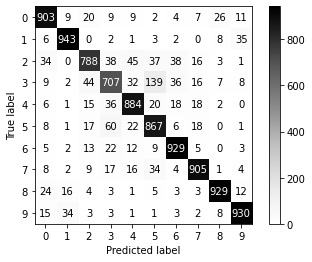

In [42]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
probabilities  = model_3.predict(X_test)
y_pred = np.argmax(probabilities, axis=1)
y_true = np.argmax(Y_test_en, axis=1)

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Greys)
plt.show()

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [58]:
probabilities  = model_3.predict(X_train)
X_pred = np.argmax(probabilities, axis=1)
X_true = np.argmax(Y_train_en, axis=1)
print("Accuracy:    ",accuracy_score(X_true,X_pred))
print("Precision:   ",precision_score(X_true,X_pred, average='macro'))
print("Recall:      ",recall_score(X_true,X_pred, average='macro'))
print("F1:          ",f1_score(X_true,X_pred, average='macro'))

Accuracy:     0.99978
Precision:    0.9997800919544246
Recall:       0.99978
F1:           0.9997799979795972


In [54]:
print("Accuracy:    ",accuracy_score(y_true,y_pred))
print("Precision:   ",precision_score(y_true,y_pred, average='macro'))
print("Recall:      ",recall_score(y_true,y_pred, average='macro'))
print("F1:          ",f1_score(y_true,y_pred, average='macro'))

Accuracy:     0.8785
Precision:    0.8786599794239119
Recall:       0.8785000000000001
F1:           0.8778678860275428
